Import Required Libraries

In [29]:
# NumPy is used for numerical computations and vectorized operations
import numpy as np

# Pandas is used for data loading and basic data manipulation
import pandas as pd

# Matplotlib is used for plotting graphs
import matplotlib.pyplot as plt


Sigmoid (Logistic) Function

In [30]:
def logistic_function(x):
    """
    Computes the sigmoid (logistic) function.

    Mathematical definition:
        σ(x) = 1 / (1 + e^(-x))

    Arguments:
    x : scalar OR numpy array

    Returns:
    y : sigmoid(x)
    """

    # np.exp(-x) computes e^(-x)
    # The formula is applied element-wise if x is an array
    return 1 / (1 + np.exp(-x))


Test Sigmoid Function

In [31]:
def test_logistic_function():
    # Test for scalar input
    x = 0
    assert round(logistic_function(x), 3) == 0.5

    # Test for positive value
    x = 2
    assert round(logistic_function(x), 3) == round(1 / (1 + np.exp(-2)), 3)

    # Test for negative value
    x = -3
    assert round(logistic_function(x), 3) == round(1 / (1 + np.exp(3)), 3)

    # Test for numpy array input
    x = np.array([0, 2, -3])
    expected = np.array([0.5, 0.881, 0.047])
    assert np.all(np.round(logistic_function(x), 3) == expected)

    print("Sigmoid function tests passed!")

test_logistic_function()


Sigmoid function tests passed!


Log-Loss Function (Binary Cross-Entropy)

In [32]:
def log_loss(y_true, y_pred):
    """
    Computes log-loss for ONE data point.

    Formula:
        L(y, ŷ) = -y log(ŷ) - (1 - y) log(1 - ŷ)

    Arguments:
    y_true : actual label (0 or 1)
    y_pred : predicted probability (between 0 and 1)

    Returns:
    loss : scalar loss value
    """

    # Clip y_pred to avoid log(0) which causes numerical error
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)

    # Apply log-loss formula
    loss = -(y_true * np.log(y_pred)) - ((1 - y_true) * np.log(1 - y_pred))

    return loss


Cost Function (Average Log-Loss)

In [33]:
def cost_function(y_true, y_pred):
    """
    Computes the average log-loss over all samples.

    Arguments:
    y_true : array of true labels (0 or 1)
    y_pred : array of predicted probabilities

    Returns:
    cost : average loss
    """

    # Ensure both arrays have same length
    assert len(y_true) == len(y_pred)

    # Number of samples
    n = len(y_true)

    # Vectorized log-loss computation for all samples
    loss_vector = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    # Compute average loss
    cost = np.sum(loss_vector) / n

    return cost


Cost Function Using Model Parameters (w, b)

In [34]:
def costfunction_logreg(X, y, w, b):
    """
    Computes logistic regression cost using parameters.

    Arguments:
    X : feature matrix (n x d)
    y : target vector (n,)
    w : weight vector (d,)
    b : bias (scalar)

    Returns:
    cost : average log-loss
    """

    # Linear combination: z = Xw + b
    z = np.dot(X, w) + b

    # Apply sigmoid to get predicted probabilities
    y_pred = logistic_function(z)

    # Compute and return cost
    return cost_function(y, y_pred)


Gradient Computation

In [35]:
def compute_gradient(X, y, w, b):
    """
    Computes gradients of cost w.r.t weights and bias.

    Mathematical gradients:
        ∂L/∂w = -(1/n) * Σ (y - ŷ) * x
        ∂L/∂b = -(1/n) * Σ (y - ŷ)
    """

    # Number of samples
    n = X.shape[0]

    # Compute predictions
    z = np.dot(X, w) + b
    y_pred = logistic_function(z)

    # Gradient with respect to weights
    grad_w = -(1 / n) * np.dot(X.T, (y - y_pred))

    # Gradient with respect to bias
    grad_b = -(1 / n) * np.sum(y - y_pred)

    return grad_w, grad_b


Gradient Descent Algorithm

In [36]:
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False):
    """
    Performs batch gradient descent optimization.
    """

    cost_history = []

    for i in range(n_iter):
        # Step 1: Compute gradients
        grad_w, grad_b = compute_gradient(X, y, w, b)

        # Step 2: Update parameters
        w = w - alpha * grad_w
        b = b - alpha * grad_b

        # Step 3: Compute cost
        cost = costfunction_logreg(X, y, w, b)

        # Store cost
        cost_history.append(cost)

        # Optionally print cost
        if show_cost and i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.6f}")

    return w, b, cost_history


Prediction Function

In [37]:
def prediction(X, w, b, threshold=0.5):
    """
    Converts predicted probabilities into class labels.
    """

    # Compute probabilities
    probs = logistic_function(np.dot(X, w) + b)

    # Apply decision threshold
    return (probs >= threshold).astype(int)


Evaluation Metrics

In [38]:
def evaluate_classification(y_true, y_pred):
    """
    Computes confusion matrix, precision, recall and F1-score.
    """

    # Confusion matrix components
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    confusion_matrix = np.array([[TN, FP],
                                 [FN, TP]])

    # Precision
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0

    # Recall
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0

    # F1 Score
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return confusion_matrix, precision, recall, f1_score


Load & Prepare PIMA Dataset

Import Libraries

In [39]:
# 1. Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Load and Preprocess Dataset

In [40]:

# 2. Load and clean the dataset
# Dataset: Pima Indians Diabetes

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Load data
data = pd.read_csv(url, names=columns)

# Replace 0s with median for columns where 0 is invalid
cols_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_to_clean] = data[cols_to_clean].replace(0, np.nan)
data.fillna(data.median(), inplace=True)

# Split into features and target
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Define Helper Functions

In [41]:

# 3. Define helper functions for logistic regression


# Sigmoid function
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

# Log loss function
def log_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1-1e-10)  # avoid log(0)
    return -y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)

# Vectorized cost function
def costfunction_logreg(X, y, w, b):
    z = np.dot(X, w) + b
    y_pred = logistic_function(z)
    losses = log_loss(y, y_pred)
    return np.mean(losses)

# Compute gradients
def compute_gradient(X, y, w, b):
    n = X.shape[0]
    z = np.dot(X, w) + b
    y_pred = logistic_function(z)
    grad_w = -(1/n) * np.dot((y - y_pred), X)
    grad_b = -(1/n) * np.sum(y - y_pred)
    return grad_w, grad_b

# Gradient descent
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False):
    cost_history = []
    for i in range(n_iter):
        grad_w, grad_b = compute_gradient(X, y, w, b)
        w -= alpha * grad_w
        b -= alpha * grad_b
        cost = costfunction_logreg(X, y, w, b)
        cost_history.append(cost)
        if show_cost and (i % 100 == 0 or i == n_iter-1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
    return w, b, cost_history

# Prediction function
def prediction(X, w, b, threshold=0.5):
    y_prob = logistic_function(np.dot(X, w) + b)
    return (y_prob >= threshold).astype(int)

# Evaluation metrics
def evaluate_classification(y_true, y_pred):
    TP = np.sum((y_true==1) & (y_pred==1))
    TN = np.sum((y_true==0) & (y_pred==0))
    FP = np.sum((y_true==0) & (y_pred==1))
    FN = np.sum((y_true==1) & (y_pred==0))
    confusion_matrix = np.array([[TN, FP],
                                 [FN, TP]])
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    return confusion_matrix, precision, recall, f1_score


Initialize Parameters and Train Model

Iteration 0: Cost = 0.676575
Iteration 100: Cost = 0.465441
Iteration 200: Cost = 0.455913
Iteration 300: Cost = 0.453874
Iteration 400: Cost = 0.453316
Iteration 500: Cost = 0.453148
Iteration 600: Cost = 0.453096
Iteration 700: Cost = 0.453079
Iteration 800: Cost = 0.453074
Iteration 900: Cost = 0.453072
Iteration 999: Cost = 0.453071


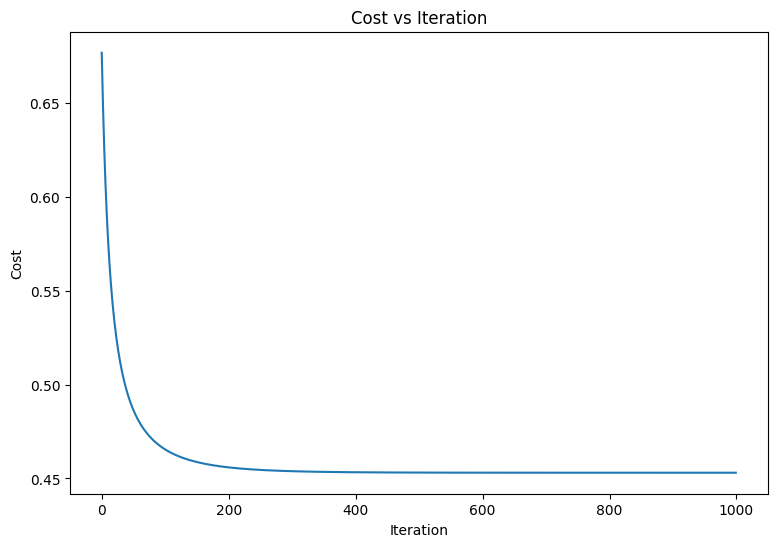

In [42]:

# 4. Initialize parameters and train logistic regression

w = np.zeros(X_train_scaled.shape[1])  # weights
b = 0.0                                # bias
alpha = 0.1                             # learning rate
n_iter = 1000                           # iterations

# Train model
w, b, cost_history = gradient_descent(X_train_scaled, y_train, w, b, alpha, n_iter, show_cost=True)

# Plot cost over iterations
plt.figure(figsize=(9,6))
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs Iteration")
plt.show()


Evaluate Overfitting / Underfitting

In [43]:

# 5. Evaluate Model: Overfitting / Underfitting

y_train_pred = prediction(X_train_scaled, w, b)
y_test_pred  = prediction(X_test_scaled, w, b)

train_cost = costfunction_logreg(X_train_scaled, y_train, w, b)
test_cost  = costfunction_logreg(X_test_scaled, y_test, w, b)

print(f"\nTrain Loss: {train_cost:.4f}")
print(f"Test Loss:  {test_cost:.4f}")

if train_cost < test_cost and (test_cost - train_cost) > 0.05:
    print("Model may be overfitting.")
elif train_cost > test_cost:
    print("Model may be underfitting.")
else:
    print("Model has a good fit.")



Train Loss: 0.4531
Test Loss:  0.5146
Model may be overfitting.


Evaluate Accuracy and Metrics

In [44]:

# 6. Evaluate Accuracy and Classification Metrics

test_accuracy = np.mean(y_test_pred == y_test) * 100
conf_matrix, precision, recall, f1_score = evaluate_classification(y_test, y_test_pred)

print(f"\nTest Accuracy: {test_accuracy:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-Score:  {f1_score:.2f}")



Test Accuracy: 70.78%
Confusion Matrix:
[[82 18]
 [27 27]]
Precision: 0.60
Recall:    0.50
F1-Score:  0.55


Confusion Matrix Visualization

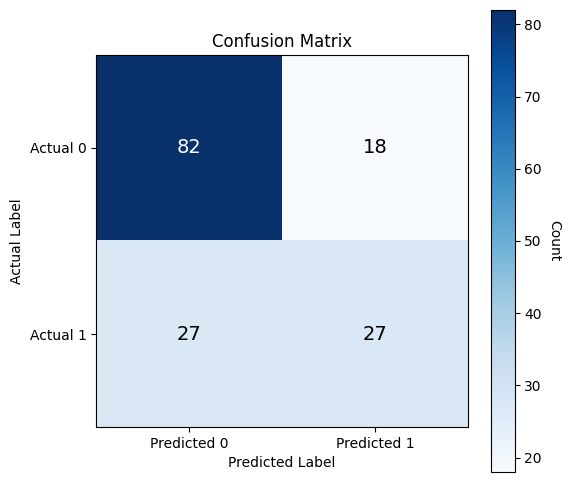

In [45]:

# 7. Confusion Matrix Visualization

fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(conf_matrix, cmap="Blues")
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Count", rotation=-90, va="bottom")

ax.set_xlabel("Predicted Label")
ax.set_ylabel("Actual Label")
ax.set_title("Confusion Matrix")

ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(["Predicted 0", "Predicted 1"])
ax.set_yticklabels(["Actual 0", "Actual 1"])

for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_matrix[i,j],
                ha="center", va="center",
                color="white" if conf_matrix[i,j]>conf_matrix.max()/2 else "black",
                fontsize=14)
ax.grid(False)
plt.show()
